In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import statistics 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv',skipinitialspace=True)

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## Cek Info Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [5]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

## Cek Describe data numerik

In [6]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,0.0,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,10344.359878,2.998758,4237.218976,376.224015,NaN,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,7151.779436,1.289790,3568.263407,658.136814,NaN,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,4.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,NaN,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,8942.000000,3.000000,3311.000000,50.000000,NaN,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,NaN,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,NaN,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


## Melihat Nilai Unik di setiap kolom

In [7]:
df.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 10
BLOCK                             11566
LOT                                2627
EASE-MENT                             0
BUILDING CLASS AT PRESENT           166
ADDRESS                           67563
APARTMENT NUMBER                   3988
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6061
GROSS SQUARE FEET                  5690
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10007
SALE DATE                           364
dtype: int64

## Cek Missing Values / noisy values

In [8]:
df.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

##  Mengatasi missing values di beberapa kolom 

In [9]:
df = df.replace(' ', np.nan)


## Cek ulang Missing Values

In [10]:
df.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

## Missing Values berdasarkan persen 

In [11]:
miss_val = (df.isnull().sum()/len(df))*100
miss_val

Unnamed: 0                          0.000000
BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                   31.049818
GROSS SQUARE FEET                  32.658372
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                         17.222170
SALE DATE                           0.000000
dtype: flo

## Menghapus Kolom yang missing values nya besar 

In [12]:
cols = ['EASE-MENT','APARTMENT NUMBER']

df.drop(labels=cols,axis=1,inplace=True)

df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


## Impute Kolom yang Masih ada Missing Values

In [13]:
df["TAX CLASS AT PRESENT"] = df["TAX CLASS AT PRESENT"].fillna(df["TAX CLASS AT PRESENT"].mode())
df["YEAR BUILT"] = df["YEAR BUILT"].fillna(df["YEAR BUILT"].mode())

# hapus sisa missing values yang ada di dataset
df = df.dropna()

## Cek Ulang missing values 

In [14]:
df.isna().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# MEAN

## Melihat MEAN dari beberapa kolom di dataset

In [15]:
meanLSF = statistics.mean(df['LAND SQUARE FEET'])
meanRU = statistics.mean(df['RESIDENTIAL UNITS'])
meanTU = statistics.mean(df['TOTAL UNITS'])
meanCU = statistics.mean(df['COMMERCIAL UNITS'])
meanGSF = statistics.mean(df['GROSS SQUARE FEET'])
meanSP = statistics.mean(df['SALE PRICE'])


print(f'Mean kolom Land Square  Feet : {meanLSF}')
print(f'Mean kolom Residental Units : {meanRU}')
print(f'Mean kolom Total Units : {meanTU}')
print(f'Mean kolom COmmercial Units : {meanCU}')
print(f'Mean kolom Gross Square Feet : {meanGSF}')
print(f'Mean kolom Sale Price : {meanSP}')

Mean kolom Land Square  Feet : 3382.7982752860603
Mean kolom Residental Units : 2.585400484423286
Mean kolom Total Units : 2.8554664662156517
Mean kolom COmmercial Units : 0.2510022550739163
Mean kolom Gross Square Feet : 3696.7247348200117
Mean kolom Sale Price : 1155606.865489017


Mean dari beberapa kolom dalam diatas memberikan informasi sebagai berikut:

1. Land Square Feet: Rata-rata luas tanah yang tercatat untuk properti yang terjual adalah sekitar 3382.8 kaki persegi. Informasi ini dapat memberikan gambaran tentang seberapa besar tanah yang biasanya terlibat dalam transaksi properti di area tersebut.

2. Residential Units: Rata-rata unit residensial yang terjual adalah sekitar 2.59 unit per properti. Hal ini menunjukkan bahwa sebagian besar properti yang terjual mungkin memiliki beberapa unit tempat tinggal seperti apartemen atau rumah dengan lebih dari satu unit.

3. Total Units: Rata-rata total unit (residensial dan komersial) per properti adalah sekitar 2.86 unit.

4. Commercial Units: Rata-rata unit komersial yang terjual adalah sekitar 0.25 unit per properti. Ini bisa mengindikasikan bahwa sebagian besar properti yang terjual mungkin lebih banyak berfokus pada penggunaan residensial daripada komersial.

5. Gross Square Feet: Rata-rata nya adalah sekitar 3696.72 kaki persegi. ini memberikan gambaran tentang ukuran total properti yang terjual.

6. Sale Price: Rata-rata harga penjualan properti adalah sekitar $1,155,606.86. Ini memberikan kisaran harga properti yang terjual di area tersebut

# MEDIAN

In [16]:
# mengubah type data SALE DATE
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE MONTH'] = df['SALE DATE'].dt.month

## Melihat Median SALE PRICE Setiap Bulan 

In [17]:
df[['TOTAL UNITS', 'SALE PRICE', 'SALE MONTH']].groupby(['SALE MONTH']).\
    agg(median_units = ('TOTAL UNITS', 'median'), median_price = ('SALE PRICE', 'median'))

,median_units,median_price
SALE MONTH,,
1,1.0,485000.0
2,1.0,470000.0
3,1.0,466440.0
4,1.0,470000.0
5,1.0,472000.0
6,1.0,505000.0
7,1.0,525000.0
8,1.0,574500.0
9,1.0,460000.0


Terlihat bahwa median price dari setiap bulan cukup seiimbang atau merata setiap bulan. Untuk Price paling besar Terjadi pada bulan Agustus dengan price 574500.0

# MODUS

In [18]:
modeRU = statistics.mode(df['RESIDENTIAL UNITS'])
modeTU = statistics.mode(df['TOTAL UNITS'])


print(f'Modus kolom Residental Units : {modeRU}')
print(f'Modus kolom Total Units : {modeTU}')

Modus kolom Residental Units : 1
Modus kolom Total Units : 1


Pada kolom Resident Units dan Total Units yang sering dipilih yaitu 1 units  

# RANGE

In [19]:
rangeLSF = np.ptp(df['LAND SQUARE FEET'])
rangeRU = np.ptp(df['RESIDENTIAL UNITS'])
rangeTU = np.ptp(df['TOTAL UNITS'])
rangeCU = np.ptp(df['COMMERCIAL UNITS'])
rangeGSF = np.ptp(df['GROSS SQUARE FEET'])
rangeSP = np.ptp(df['SALE PRICE'])


print(f'Range kolom Land Square  Feet : {rangeLSF}')
print(f'Range kolom Residental Units : {rangeRU}')
print(f'Range kolom Total Units : {rangeTU}')
print(f'Range kolom Commercial Units : {rangeCU}')
print(f'Range kolom Gross Square Feet : {rangeGSF}')
print(f'Range kolom Sale Price : {rangeSP}')


Range kolom Land Square  Feet : 4228300.0
Range kolom Residental Units : 1844
Range kolom Total Units : 2261
Range kolom Commercial Units : 2261
Range kolom Gross Square Feet : 3750565.0
Range kolom Sale Price : 2210000000.0



1. Luas Tanah: Varian luas tanah dari properti terjual berkisar hingga 4,228,300 kaki persegi.
2. Unit Residensial: Jumlah unit residensial memiliki variasi hingga 1,844 unit.
3. Total Unit: Jumlah total unit (residensial dan komersial) bervariasi hingga 2,261 unit.
4. Unit Komersial: Jumlah unit komersial juga memiliki variasi hingga 2,261 unit.
5. Luas Total: Varian luas total properti yang terjual mencapai 3,750,565 kaki persegi.
6. Harga Jual: Rentang harga penjualan properti mencapai 2,210,000,000.

Dari rentang ini, dapat disimpulkan bahwa ada variasi yang signifikan dalam luas, jumlah unit, ukuran total, dan harga properti yang terjual di NYC. Hal ini mencerminkan keragaman pasar properti di kota tersebut, dari properti yang lebih kecil dan terjangkau hingga properti besar dan mewah.

# VARIANCE

In [20]:
varLSF = statistics.variance(df['LAND SQUARE FEET'])
varRU = statistics.variance(df['RESIDENTIAL UNITS'])
varTU = statistics.variance(df['TOTAL UNITS'])
varCU = statistics.variance(df['COMMERCIAL UNITS'])
varGSF = statistics.variance(df['GROSS SQUARE FEET'])
varSP = statistics.variance(df['SALE PRICE'])


print(f'Variance kolom Land Square  Feet : {varLSF}')
print(f'Variance kolom Residental Units : {varRU}')
print(f'Variance kolom Total Units : {varTU}')
print(f'Variance kolom COmmercial Units : {varCU}')
print(f'Variance kolom Gross Square Feet : {varGSF}')
print(f'Variance kolom Sale Price : {varSP}')

Variance kolom Land Square  Feet : 995395514.6862696
Variance kolom Residental Units : 307.23634319639825
Variance kolom Total Units : 433.68510866089963
Variance kolom COmmercial Units : 121.62468317411948
Variance kolom Gross Square Feet : 875056201.3088927
Variance kolom Sale Price : 180908516399512.9


 Variansi yang tinggi dalam kolom Luas Tanah, Luas Total, dan Harga Jual mengindikasikan variasi yang besar dari properti yang terjual, baik dari segi ukuran maupun harga. Sementara itu, variansi yang lebih rendah dalam kolom Unit Residensial, Total Unit, dan Unit Komersial menunjukkan sedikit variasi dari jumlah unit di dalam properti, mungkin menandakan konsistensi yang lebih tinggi dalam jenis unit yang terdapat di properti yang terjual. Dalam hal ini, properti-properti di NYC memiliki variasi yang signifikan dalam ukuran, luas, dan harga, sementara variasi dalam jumlah unit cenderung lebih terbatas

# STANDAR DEVIASI

In [21]:
stLSF = statistics.stdev(df['LAND SQUARE FEET'])
stRU = statistics.stdev(df['RESIDENTIAL UNITS'])
stTU = statistics.stdev(df['TOTAL UNITS'])
stCU = statistics.stdev(df['COMMERCIAL UNITS'])
stGSF = statistics.stdev(df['GROSS SQUARE FEET'])
stSP = statistics.stdev(df['SALE PRICE'])


print(f'Standard Deviasi kolom Land Square  Feet : {stLSF}')
print(f'Standard Deviasi kolom Residental Units : {stRU}')
print(f'Standard Deviasi kolom Total Units : {stTU}')
print(f'Standard Deviasi kolom COmmercial Units : {stCU}')
print(f'Standard Deviasi kolom Gross Square Feet : {stGSF}')
print(f'Standard Deviasi kolom Sale Price : {stSP}')

Standard Deviasi kolom Land Square  Feet : 31549.889297527963
Standard Deviasi kolom Residental Units : 17.52815857973673
Standard Deviasi kolom Total Units : 20.82510765064372
Standard Deviasi kolom COmmercial Units : 11.0283581359203
Standard Deviasi kolom Gross Square Feet : 29581.348875750962
Standard Deviasi kolom Sale Price : 13450223.6561149


Nilai standar deviasi yang besar pada Luas Tanah, Luas Total, dan Harga Jual menunjukkan variasi besar dalam ukuran dan harga properti. Sedangkan standar deviasi yang lebih rendah pada Unit Residensial, Total Unit, dan Unit Komersial menandakan sedikit variasi dari jumlah unit di dalam properti yang terjual. Artinya, properti di NYC memiliki variasi besar dalam ukuran dan harga, namun variasi jumlah unit cenderung lebih terbatas.

# PROBABILITY DISTRIBUTION

## melihat probability distribution di SALE PRICE

In [22]:
# mmebuat batas untuk range price
df_priceProb = df[(df['SALE PRICE'] > 5000) & (df['SALE PRICE'] < 60000)]

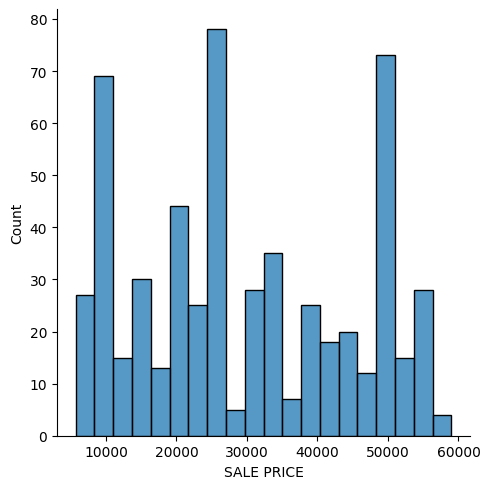

In [23]:
sns.displot(df_priceProb['SALE PRICE'], bins=20)

dari plot probabilitas diatas pada Sale price sekitar 25000 ke atas, lalu di 10000 dan 50000 memiliki nilai yang tinggi bisa diartikan bahwa price tersebut paling sering muncul atau frekuensi kemunculan nilai-nilai tersebut paling tinggi pada dataset 

# CONFIDENT INTERVALS

In [24]:
# Pilih kolom numerik yang akan dihitung confidence interval-nya
num_cols = ['LAND SQUARE FEET', 'RESIDENTIAL UNITS', 'TOTAL UNITS', 'COMMERCIAL UNITS', 'GROSS SQUARE FEET', 'SALE PRICE']

# Membuat dictionary untuk menyimpan confidence interval dari setiap kolom
confidence_intervals = {}

# Iterasi melalui setiap kolom numerik
for col in num_cols:
    # Hapus nilai yang hilang (missing values)
    data = df[col].dropna()
    
    # Hitung confidence interval dengan tingkat kepercayaan 95%
    confidence_interval = stats.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=stats.sem(data))
    
    # Simpan confidence interval dalam dictionary
    confidence_intervals[col] = confidence_interval

# Tampilkan confidence interval untuk setiap kolom
for col, interval in confidence_intervals.items():
    print(f"Confidence Interval untuk {col}: {interval}")

Confidence Interval untuk LAND SQUARE FEET: (3100.2286862223305, 3665.36786434979)
Confidence Interval untuk RESIDENTIAL UNITS: (2.4284134179961407, 2.742387550850431)
Confidence Interval untuk TOTAL UNITS: (2.6689510063496353, 3.041981926081668)
Confidence Interval untuk COMMERCIAL UNITS: (0.15222921035331843, 0.3497752997945142)
Confidence Interval untuk GROSS SQUARE FEET: (3431.7859416298015, 3961.663528010222)
Confidence Interval untuk SALE PRICE: (1035142.9191504972, 1276070.8118275367)


Sedikit kesimpulan yang bisa didapat dari melihat confidence interval kolom kolom diatas yaitu untuk 'LAND SQUARE FEET', rentang confidence intervalnya adalah antara sekitar 3100 hingga 3665 kaki persegi, dengan tingkat kepercayaan 95%. Artinya, nilai rata-rata luas tanah properti di populasi mungkin berada dalam rentang tersebut. Begitu juga untuk 'SALE PRICE', di mana nilai rata-rata harga penjualan properti diperkirakan berada antara $1,035,142 hingga $1,276,070. Rentang ini memberikan pandangan tentang seberapa luas variasi yang mungkin ada dalam nilai rata-rata sebenarnya dari fitur-fitur ini di populasi properti NYC, dengan tingkat kepercayaan yang dipilih.

# Hypothesis Testing

## Kruskal-Wallis

Pertanyaan: "Apakah terdapat perbedaan yang signifikan dalam harga penjualan properti ('SALE PRICE') antara jenis properti yang berbeda ('BUILDING CLASS CATEGORY') dalam dataset properti NYC?"

Interpretasi:


H0: Tidak ada perbedaan yang signifikan dalam harga penjualan properti di antara jenis properti yang berbeda.

H1: Terdapat perbedaan yang signifikan dalam harga penjualan properti di antara setidaknya dua jenis properti yang berbeda.

In [25]:
# mengubah kolom building class category menjadi numerik

building_class = df['BUILDING CLASS CATEGORY']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah kategori teks menjadi bentuk numerik
encoded_building_class = label_encoder.fit_transform(building_class)

# Menampilkan contoh hasil transformasi
print(encoded_building_class[:10]) 

[ 6  6  6  6  7  7  8 14 14 14]


In [29]:
# Memilih kolom 'SALE PRICE' dari dataset
sale_price = df['SALE PRICE']


# Melakukan uji Kruskal-Wallis
statistic, p_value = stats.kruskal(sale_price,encoded_building_class)

# Menampilkan hasil uji
print(f"Nilai statistik Kruskal-Wallis: {statistic}")
print(f"Nilai p-value: {p_value}")


Nilai statistik Kruskal-Wallis: 29310.44282366207
Nilai p-value: 0.0


Hasil uji Kruskal-Wallis menunjukkan nilai statistik yang tinggi (29310.44) dan nilai p-value yang sangat rendah (0.0). Dalam hal ini, nilai p-value yang sangat rendah menunjukkan bahwa terdapat bukti yang sangat kuat untuk menolak hipotesis nol (H0).

Terdapat perbedaan yang signifikan dalam harga penjualan properti di antara setidaknya dua jenis properti yang berbeda. Hal ini dapat disimpulkan dari nilai p-value yang sangat rendah, yang menunjukkan adanya perbedaan yang signifikan dalam harga penjualan properti di antara jenis-jenis properti yang diuji.